In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [3]:
df=pd.read_csv("mushrooms.csv")
df.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5624,e,x,y,b,t,n,f,c,b,e,...,s,e,e,p,w,t,e,w,c,w
1999,e,x,s,n,f,n,f,w,b,k,...,f,w,w,p,w,o,e,k,s,g
788,p,x,y,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,n,s,g
381,e,x,s,w,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,s,g
5676,p,x,s,g,t,f,f,c,b,h,...,f,w,w,p,w,o,p,h,v,g


In [4]:
df.shape

(8124, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [19]:
dataset =  LabelEncoder()
for col in df.columns:
  df[col]=dataset.fit_transform(df[col])

In [20]:
df.sample(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6394,1,2,2,2,0,8,1,0,1,0,...,1,6,6,0,2,1,0,7,4,0
4092,0,2,3,4,1,5,1,0,0,5,...,2,7,7,0,2,1,4,3,5,0
3773,0,5,0,2,1,5,1,0,0,5,...,2,3,7,0,2,1,4,2,5,0
5115,1,5,2,3,1,2,1,0,0,3,...,0,7,7,0,2,1,4,1,3,1
7362,1,3,2,2,0,8,1,0,1,0,...,2,6,7,0,2,1,0,7,4,2
4613,1,5,3,9,0,2,1,0,0,3,...,1,0,0,0,2,1,2,1,5,0
2923,0,5,0,3,1,5,1,0,0,9,...,2,3,6,0,2,1,4,2,5,0
701,0,2,0,3,0,5,1,1,0,3,...,0,7,7,0,2,1,0,3,0,1
5330,1,2,3,3,0,2,1,0,0,7,...,1,4,0,0,2,1,2,1,4,0
3919,1,2,3,3,0,2,1,0,0,3,...,1,4,0,0,2,1,2,1,4,0


array(['d', 'g', 'l', 'm', 'p', 'u', 'w'], dtype=object)

In [22]:
x=df.drop(columns=["class"])
y=df["class"]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,)

In [24]:

model = DecisionTreeClassifier() 

In [25]:
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [27]:
y_pred = model.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

1.0

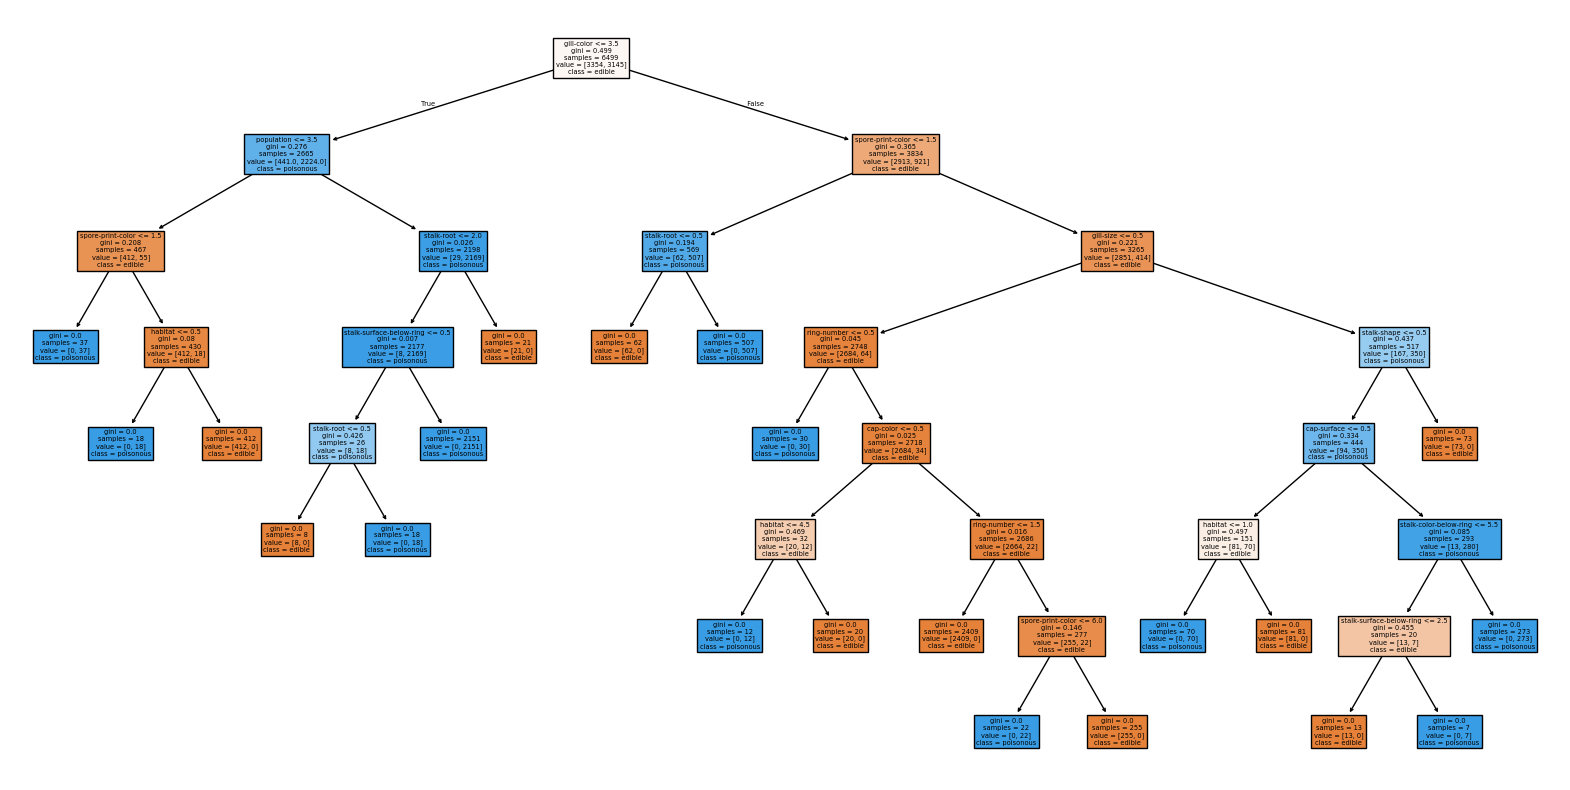

In [29]:
from sklearn.tree import plot_tree


plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=x.columns, class_names=['edible', 'poisonous'])
plt.show()
